**EDA**


In [0]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('train_fNxu4vz.csv')
data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [3]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


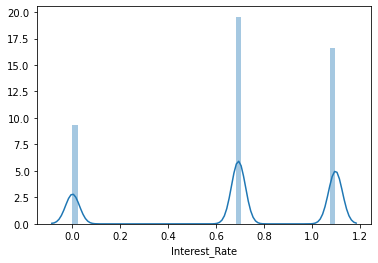

In [6]:
sns.distplot(data['Interest_Rate'])

In [0]:
data.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [0]:
data.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [0]:
data.shape

(164309, 14)

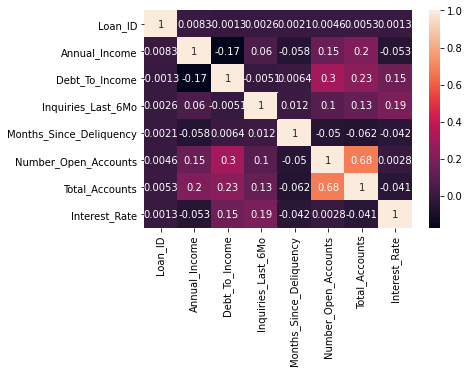

In [0]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

**Pre Processing**

In [0]:
data.fillna({'Months_Since_Deliquency':data['Months_Since_Deliquency'].mean(),'Annual_Income':data['Annual_Income'].mean()},inplace=True)

In [0]:
data.fillna({'Home_Owner':data['Home_Owner'].iloc[-1],'Length_Employed':data['Length_Employed'].iloc[-1]},inplace=True)

In [0]:
data['Loan_Amount_Requested']=[x.replace(',','') for x in data['Loan_Amount_Requested']]

In [0]:
data['Loan_Amount_Requested']=data['Loan_Amount_Requested'].astype('int64')

In [0]:
data.select_dtypes('object')

,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender
0,< 1 year,Rent,not verified,car,Female
1,4 years,Mortgage,VERIFIED - income,debt_consolidation,Female
2,7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male
3,< 1 year,Rent,VERIFIED - income source,debt_consolidation,Male
4,8 years,Own,VERIFIED - income source,debt_consolidation,Female
...,...,...,...,...,...
164304,10+ years,Rent,VERIFIED - income source,credit_card,Male
164305,8 years,Own,VERIFIED - income source,small_business,Male
164306,10+ years,Mortgage,VERIFIED - income,credit_card,Male
164307,4 years,Rent,not verified,major_purchase,Female


In [0]:
data=pd.get_dummies(data=data,columns=['Length_Employed','Home_Owner','Income_Verified','Purpose_Of_Loan','Gender'])

In [0]:
data.drop('Loan_ID',axis=1,inplace=True)

In [0]:
data.shape

(164309, 43)

In [0]:
data.columns

Index(['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Interest_Rate', 'Length_Employed_1 year',
       'Length_Employed_10+ years', 'Length_Employed_2 years',
       'Length_Employed_3 years', 'Length_Employed_4 years',
       'Length_Employed_5 years', 'Length_Employed_6 years',
       'Length_Employed_7 years', 'Length_Employed_8 years',
       'Length_Employed_9 years', 'Length_Employed_< 1 year',
       'Home_Owner_Mortgage', 'Home_Owner_None', 'Home_Owner_Other',
       'Home_Owner_Own', 'Home_Owner_Rent',
       'Income_Verified_VERIFIED - income',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_pu

In [0]:
data.rename(columns={'Length_Employed_< 1 year':'Length_Employed_Less than 1 year'},inplace=True)

**Train test split**

In [0]:
from sklearn.model_selection import train_test_split
x=data.drop('Interest_Rate',axis=1)
y=data['Interest_Rate']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Applying model and hyperparametric tuning**


In [0]:
import xgboost

In [0]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [0]:
xgc=xgboost.XGBClassifier()

In [0]:
params={
    'learning_rate':[0.05,0.10,0.20,0.25,0.30],
    'max_depth':[3,4,5,7,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.05,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [0]:
random_search=RandomizedSearchCV(xgc,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [0]:
random_search.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 25.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [0]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
clc_pred=classifier.predict(x_test)

**Evaluation**

In [0]:
from sklearn.metrics import classification_report,accuracy_score,f1_score

In [0]:
print(f1_score(y_test,clc_pred,average='weighted'))

0.5321940064610441


In [0]:
test=pd.read_csv('test_fjtUOL8.csv')

In [0]:
test.shape

(109541, 13)

In [0]:
test.isnull().sum()

Loan_Amount_Requested                       0
Annual_Income                               0
Debt_To_Income                              0
Inquiries_Last_6Mo                          0
Months_Since_Deliquency                     0
Number_Open_Accounts                        0
Total_Accounts                              0
Length_Employed_1 year                      0
Length_Employed_10+ years                   0
Length_Employed_2 years                     0
Length_Employed_3 years                     0
Length_Employed_4 years                     0
Length_Employed_5 years                     0
Length_Employed_6 years                     0
Length_Employed_7 years                     0
Length_Employed_8 years                     0
Length_Employed_9 years                     0
Length_Employed_Less than 1 year            0
Home_Owner_Mortgage                         0
Home_Owner_None                             0
Home_Owner_Other                            0
Home_Owner_Own                    

**Applying model on Test dataset**

In [0]:
test.fillna({'Months_Since_Deliquency':test['Months_Since_Deliquency'].mean(),'Annual_Income':test['Annual_Income'].mean()},inplace=True)
test.fillna({'Home_Owner':test['Home_Owner'].iloc[-1],'Length_Employed':test['Length_Employed'].iloc[-1]},inplace=True)
test['Loan_Amount_Requested']=[x.replace(',','') for x in test['Loan_Amount_Requested']]
test['Loan_Amount_Requested']=test['Loan_Amount_Requested'].astype('int64')
test=pd.get_dummies(data=test,columns=['Length_Employed','Home_Owner','Income_Verified','Purpose_Of_Loan','Gender'])
test.drop('Loan_ID',axis=1,inplace=True)
test.rename(columns={'Length_Employed_< 1 year':'Length_Employed_Less than 1 year'},inplace=True)

In [0]:
test.columns

Index(['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Length_Employed_1 year', 'Length_Employed_10+ years',
       'Length_Employed_2 years', 'Length_Employed_3 years',
       'Length_Employed_4 years', 'Length_Employed_5 years',
       'Length_Employed_6 years', 'Length_Employed_7 years',
       'Length_Employed_8 years', 'Length_Employed_9 years',
       'Length_Employed_Less than 1 year', 'Home_Owner_Mortgage',
       'Home_Owner_None', 'Home_Owner_Other', 'Home_Owner_Own',
       'Home_Owner_Rent', 'Income_Verified_VERIFIED - income',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       

In [0]:
test.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Length_Employed_1 year,Length_Employed_10+ years,Length_Employed_2 years,Length_Employed_3 years,Length_Employed_4 years,Length_Employed_5 years,Length_Employed_6 years,Length_Employed_7 years,Length_Employed_8 years,Length_Employed_9 years,Length_Employed_Less than 1 year,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Income_Verified_VERIFIED - income,Income_Verified_VERIFIED - income source,Income_Verified_not verified,Purpose_Of_Loan_car,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_educational,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,27500,129000.0,12.87,0,68.000000,10,37,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,26000,110000.0,11.37,0,33.914684,6,23,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6075,75000.0,6.83,2,33.914684,5,20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,12000,73000.0,7.76,0,33.914684,6,8,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,35000,156000.0,9.62,0,26.000000,9,21,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
x=classifier.predict(test)

In [0]:
test1=pd.read_csv('test_fjtUOL8.csv')

In [0]:
test1['Loan_ID']

0         10164310
1         10164311
2         10164312
3         10164313
4         10164314
            ...   
109536    10273846
109537    10273847
109538    10273848
109539    10273849
109540    10273850
Name: Loan_ID, Length: 109541, dtype: int64

In [0]:
test1['Interest_Rate']=x

In [0]:
xgboost_loan_predictions=test1[['Loan_ID','Interest_Rate']]

In [0]:
xgboost_loan_predictions.to_csv('xgboost_loan_predictions.csv')